## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [4]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
norm_x_train = x_train.astype('float32') / 255
norm_x_test = x_test.astype('float32') / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:

trainX = norm_x_train.reshape((norm_x_train.shape[0], 28, 28, 1))
testX = norm_x_test.reshape((norm_x_test.shape[0], 28, 28, 1))

### Import the necessary layers from keras to build the model

In [9]:
mymodel = tf.keras.models.Sequential()
mymodel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2,  activation='relu', input_shape=(28,28,1)))
mymodel.add(tf.keras.layers.MaxPooling2D(pool_size=2))
mymodel.add(tf.keras.layers.Dropout(0.3))


W0818 14:01:09.402451 139868639434624 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
mymodel.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
mymodel.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

mymodel.add(tf.keras.layers.Flatten())

mymodel.add(tf.keras.layers.Dense(128, activation='relu'))

mymodel.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
mymodel.fit(trainX, y_train, 
          validation_data=(testX, y_test), 
          epochs=10,
          batch_size=32,
          callbacks=[earlystopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.4334 - acc: 0.8408 - val_loss: 0.3324 - val_acc: 0.8776
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2805 - acc: 0.8969 - val_loss: 0.2808 - val_acc: 0.9004
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2376 - acc: 0.9115 - val_loss: 0.2517 - val_acc: 0.9085
Epoch 4/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2058 - acc: 0.9228 - val_loss: 0.2721 - val_acc: 0.9027
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1774 - acc: 0.9317 - val_loss: 0.2683 - val_acc: 0.9100
Epoch 6/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1524 - acc: 0.9428 - val_loss: 0.2763 - val_acc: 0.9065
Epoch 7/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1295 - acc: 0.9502 - val_

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
mymodel_2 = tf.keras.models.Sequential()

mymodel_2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
mymodel_2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

mymodel_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

mymodel_2.add(tf.keras.layers.Dropout(0.25))

mymodel_2.add(tf.keras.layers.Flatten())

mymodel_2.add(tf.keras.layers.Dense(128, activation='relu'))
mymodel_2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
mymodel_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mymodel_2.fit(trainX, y_train, 
          validation_data=(testX, y_test), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3660 - acc: 0.8687 - val_loss: 0.2794 - val_acc: 0.9007
Epoch 2/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2384 - acc: 0.9122 - val_loss: 0.2633 - val_acc: 0.9050
Epoch 3/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.1879 - acc: 0.9301 - val_loss: 0.2392 - val_acc: 0.9121
Epoch 4/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1519 - acc: 0.9427 - val_loss: 0.2314 - val_acc: 0.9179
Epoch 5/10
60000/60000 [==============================] - 8s 142us/sample - loss: 0.1216 - acc: 0.9535 - val_loss: 0.2483 - val_acc: 0.9212
Epoch 6/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0995 - acc: 0.9630 - val_loss: 0.2719 - val_acc: 0.9178
Epoch 7/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0803 - acc: 0.9702 - val_l

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
import keras
data_genrator = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

batchsize = 64
train_gen = data_genrator.flow(trainX,y_train, batch_size=batchsize) 
test_gen = data_genrator.flow(testX,y_test, batch_size=batchsize)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

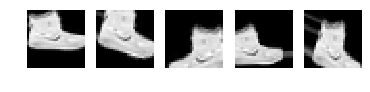

In [22]:
from matplotlib import pyplot as plt
gen = data_genrator.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [23]:
mymodel_2.fit_generator(train_gen, 
                          epochs=10,
                          validation_data=test_gen)

Epoch 1/10
938/938 [==============================] - 19s 20ms/step - loss: 0.8303 - acc: 0.6980 - val_loss: 0.6231 - val_acc: 0.7747
Epoch 2/10
938/938 [==============================] - 18s 20ms/step - loss: 0.5957 - acc: 0.7778 - val_loss: 0.5620 - val_acc: 0.7891
Epoch 3/10
938/938 [==============================] - 18s 20ms/step - loss: 0.5419 - acc: 0.7996 - val_loss: 0.5157 - val_acc: 0.8108
Epoch 4/10
938/938 [==============================] - 19s 20ms/step - loss: 0.5069 - acc: 0.8137 - val_loss: 0.4914 - val_acc: 0.8154
Epoch 5/10
938/938 [==============================] - 18s 20ms/step - loss: 0.4802 - acc: 0.8225 - val_loss: 0.4774 - val_acc: 0.8274
Epoch 6/10
938/938 [==============================] - 18s 19ms/step - loss: 0.4658 - acc: 0.8268 - val_loss: 0.4483 - val_acc: 0.8332
Epoch 7/10
938/938 [==============================] - 19s 20ms/step - loss: 0.4532 - acc: 0.8325 - val_loss: 0.4408 - val_acc: 0.8396
Epoch 8/10
938/938 [==============================] - 18s 19ms

###  Report the final train and validation accuracy

In [24]:
mymodel_2_result=mymodel_2.evaluate(testX,y_test,verbose=1)


10000/10000 [==============================] - 1s 81us/sample - loss: 0.3137 - acc: 0.8912


In [26]:
print ("Model accuracy is",mymodel_2_result[1]*100)
print ("Model Loss is",mymodel_2_result[0])

Model accuracy is 89.12000060081482
Model Loss is 0.3136592353463173


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [28]:
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_genrator = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
data_genrator.fit(cifar10_x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

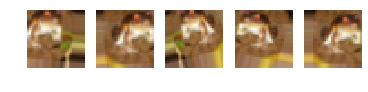

In [32]:
import numpy as np
from matplotlib import pyplot as plt
gen = data_genrator.flow(cifar10_x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype(np.uint8).squeeze())
    plt.plot()
plt.show()